# Many Assets

<a href="#Read-CSV-File">Read CSV File</a>

<a href="#Plot-Adj-Close">Plot Adj Close</a>

<a href="#Plot-Normalized-Adj-Close">Plot Normalized Adj Close</a>

<a href="#Compute-Daily-Return">Compute Daily Return</a>

<a href="#Compute-Annualized-Expected-Return,-Volatility,-and-Covariance-Matrix">Compute Annualized Expected Return, Volatility, and Covariance Matrix</a>

<a href="#Risk-Return-Plot">Risk Return Plot</a>

# Read CSV Fle

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
start = "2017-01-01"
end   = "2017-12-31"
dates = pd.date_range(start, end)

In [3]:
df_adj_close = pd.DataFrame(index=dates) 
df_temp      = pd.read_csv("../data/finance/python_for_finance/stocks.csv", index_col="Date") 
df_adj_close = df_adj_close.join(df_temp).dropna()

In [4]:
df_adj_close.head()

,KO,MS,005930.KS,000660.KS
2017-01-02,41.459999,42.250000,36100.0,45800.0
2017-01-03,41.799999,43.049999,36480.0,47250.0
2017-01-04,41.650002,43.619999,36160.0,46500.0
2017-01-05,41.750000,43.220001,35560.0,46950.0
2017-01-06,41.740002,43.849998,36200.0,48000.0


In [5]:
df_adj_close.tail()

,KO,MS,005930.KS,000660.KS
2017-12-22,45.590000,52.720001,49700.0,76700.0
2017-12-26,45.810001,52.470001,48200.0,74000.0
2017-12-27,45.930000,52.570000,49360.0,75100.0
2017-12-28,45.720001,52.650002,50960.0,76500.0
2017-12-29,45.880001,52.470001,50960.0,76500.0


[<a href="#Many-Assets">Back to top</a>]

# Plot Adj Close

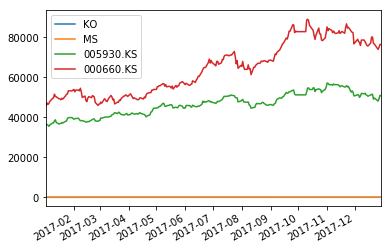

In [6]:
df_adj_close.plot()

[<a href="#Many-Assets">Back to top</a>]

# Plot Normalized Adj Close

In [7]:
df_normalized_prices = df_adj_close / df_adj_close.iloc[0,:]  

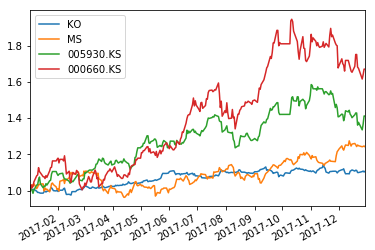

In [8]:
df_normalized_prices.plot()

[<a href="#Many-Assets">Back to top</a>]

# Compute Daily Return

In [9]:
df_daily_return = df_adj_close.pct_change()
df_daily_return.head()

,KO,MS,005930.KS,000660.KS
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.008201,0.018935,0.010526,0.031659
2017-01-04,-0.003588,0.013240,-0.008772,-0.015873
2017-01-05,0.002401,-0.009170,-0.016593,0.009677
2017-01-06,-0.000239,0.014577,0.017998,0.022364


In [10]:
df_daily_return.describe()

,KO,MS,005930.KS,000660.KS
count,258.000000,258.000000,258.000000,258.000000
mean,0.000409,0.000924,0.001445,0.002215
std,0.005669,0.013004,0.014699,0.021225
min,-0.020408,-0.055556,-0.050847,-0.067961
25%,-0.002615,-0.006107,-0.005569,-0.009114
50%,0.000655,0.000000,0.000000,0.000503
75%,0.003990,0.008364,0.010104,0.016429
max,0.018793,0.054593,0.041270,0.069964


[<a href="#Many-Assets">Back to top</a>]

# Compute Annualized Expected Return, Volatility, and Covariance Matrix

In [11]:
def compute_expected_return(df_daily_return):
    return 252 * df_daily_return.mean() 

In [12]:
df_mu = compute_expected_return(df_daily_return)
df_mu

KO           0.103004
MS           0.232919
005930.KS    0.364126
000660.KS    0.558234
dtype: float64

In [13]:
def compute_volatility(df_daily_return):
    return np.sqrt(252 * df_daily_return.var())

In [14]:
df_vol = compute_volatility(df_daily_return)
df_vol

KO           0.089987
MS           0.206439
005930.KS    0.233347
000660.KS    0.336944
dtype: float64

In [15]:
def compute_covariance_matrix(df_daily_return):
    return 252 * df_daily_return.cov()

In [16]:
df_cov = compute_covariance_matrix(df_daily_return)
df_cov

,KO,MS,005930.KS,000660.KS
KO,0.008098,-0.001581,0.000666,0.002877
MS,-0.001581,0.042617,0.000291,0.001657
005930.KS,0.000666,0.000291,0.054451,0.043340
000660.KS,0.002877,0.001657,0.043340,0.113531


[<a href="#Many-Assets">Back to top</a>]

# Risk Return Plot

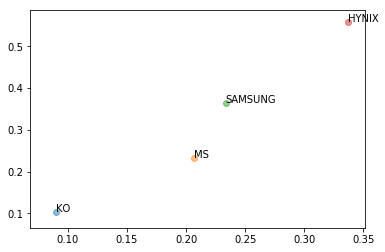

In [17]:
ticker_list = ['KO', 'MS', 'SAMSUNG', 'HYNIX']

fig, ax = plt.subplots()
     
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))

[<a href="#Many-Assets">Back to top</a>]